<a href="https://colab.research.google.com/github/DB9653/Projektarbeit/blob/main/FINAL_NSIT_IIITDWD_HASOC2019_subtaskB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

# Dataset Reading


In [ ]:


import pandas as pd 
data = pd.read_csv("/content/german_dataset2019.tsv",sep="\t", encoding = "UTF-8")

pd.set_option('display.max_colwidth',150)
data



,text_id,text,task_1,task_2
0,hasoc_de_1,Frank Rennicke – Ich bin stolz https://t.co/Cm6TD8w1k1 https://t.co/qynXso07Zn,NOT,NONE
1,hasoc_de_2,ANSEHEN.....und danach bitte TEILEN...TEILEN....TEILEN.... https://t.co/z18lnbOWRQ,NOT,NONE
2,hasoc_de_3,"#Koeln Mohamed erkennt kein deutsches Recht sondern nur die #Scharia an. Das er den Kölner Dom kaputt machen wollte, war nur ein Scherz aber wenn ...",NOT,NONE
3,hasoc_de_4,#SaudiArabien ist eine brutale islamische Diktatur und richtete kürzlich fünf Männer wegen ihre Homosexualität hin. Welche Konsequenzen hat das fü...,NOT,NONE
4,hasoc_de_5,"Bundespolizei #München hat im 1. Quartal 2019 rund 3.380 illegale Einreisen registriert, die Migranten stammten v. a. aus Nigeria, Afghanistan, Se...",NOT,NONE
...,...,...,...,...
3814,hasoc_de_3815,"akquirieren Männer,die sich um die Kinder kümmern wollen! https://t.co/VfsjutDcS9",NOT,NONE
3815,hasoc_de_3816,"Ja,schon seit Jahren! Ich muß dran denken,das Sie jeden Frühling wiederkommen und die Türen zum Wohnbereich schließen,sonst nehmen Sie das ganze ...",NOT,NONE
3816,hasoc_de_3817,@Kurkamp @wendt_joachim @Schroeder_Live @lamnitzer @DerSPIEGEL @SZ Und von Neutralität außerdem.,NOT,NONE
3817,hasoc_de_3818,"EU Wahlen! AfD für Kindererziehungszeiten für den Vater,Versorgungsausgleich für Ausfall der Frau durch Schwangerschaft und Niederkunft,sowie Er...",NOT,NONE


In [ ]:
data.shape

(3819, 4)

In [ ]:
print(data.dtypes)

text_id    object
text       object
task_1     object
task_2     object
dtype: object



# Making of "label" Variable


In [ ]:


label = data['task_2']
label.head(10)



0    NONE
1    NONE
2    NONE
3    NONE
4    NONE
5    NONE
6    NONE
7    NONE
8    NONE
9    NONE
Name: task_2, dtype: object


# Checking Dataset Balancing


NONE    3412
OFFN     210
HATE     111
PRFN      86
Name: task_2, dtype: int64


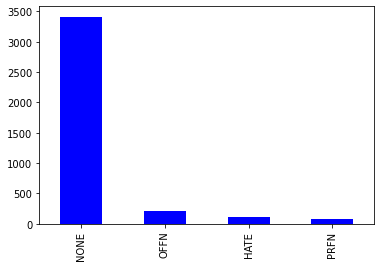

In [ ]:


print(label.value_counts())
import matplotlib.pyplot as plt
label.value_counts().plot(kind='bar', color='blue')



# Convering label into "0-NONE", "1-HATE", "2-OFFN", and "3-PRFN"


In [ ]:



import numpy as np
classes_list = ["NONE","HATE","OFFN","PRFN"]
label_index = data['task_2'].apply(classes_list.index)
final_label = np.asarray(label_index)
print(final_label[:50])



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:


from keras.utils.np_utils import to_categorical
label_twoDimension = to_categorical(final_label, num_classes=4)



In [ ]:
print(label_twoDimension[:10])

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


# Making of "text" Variable


In [ ]:


text = data['text']
text.head(10)



0                                                                           Frank Rennicke – Ich bin stolz https://t.co/Cm6TD8w1k1 https://t.co/qynXso07Zn
1                                                                       ANSEHEN.....und danach bitte TEILEN...TEILEN....TEILEN.... https://t.co/z18lnbOWRQ
2    #Koeln Mohamed erkennt kein deutsches Recht sondern nur die #Scharia an. Das er den Kölner Dom kaputt machen wollte, war nur ein Scherz aber wenn ...
3    #SaudiArabien ist eine brutale islamische Diktatur und richtete kürzlich fünf Männer wegen ihre Homosexualität hin. Welche Konsequenzen hat das fü...
4    Bundespolizei #München hat im 1. Quartal 2019 rund 3.380 illegale Einreisen registriert, die Migranten stammten v. a. aus Nigeria, Afghanistan, Se...
5    #1EuropaFuerAlle oder wie es die #SPD heute noch bildhafteter formuliert hat:    Und willst Du nicht mein Bruder sein, so schlage ich Dir denn Sch...
6    #Hannover: Weil ihm die Freizeitgestaltung und ihr Umgang mit Män

# Dataset Pre-processing


In [ ]:
def remove_umlaut(string):
    """
    Removes umlauts from strings and replaces them with the letter+e convention
    :param string: string to remove umlauts from
    :return: unumlauted string
    """
    u = 'ü'.encode()
    U = 'Ü'.encode()
    a = 'ä'.encode()
    A = 'Ä'.encode()
    o = 'ö'.encode()
    O = 'Ö'.encode()
    ss = 'ß'.encode()

    string = string.encode()
    string = string.replace(u, b'ue')
    string = string.replace(U, b'Ue')
    string = string.replace(a, b'ae')
    string = string.replace(A, b'Ae')
    string = string.replace(o, b'oe')
    string = string.replace(O, b'Oe')
    string = string.replace(ss, b'ss')

    string = string.decode('utf-8')
    return string

In [ ]:
text_wo_umlauts = text.apply(lambda x:remove_umlaut(x))
text_wo_umlauts.head(10)

0                                                                           Frank Rennicke – Ich bin stolz https://t.co/Cm6TD8w1k1 https://t.co/qynXso07Zn
1                                                                       ANSEHEN.....und danach bitte TEILEN...TEILEN....TEILEN.... https://t.co/z18lnbOWRQ
2    #Koeln Mohamed erkennt kein deutsches Recht sondern nur die #Scharia an. Das er den Koelner Dom kaputt machen wollte, war nur ein Scherz aber wenn...
3    #SaudiArabien ist eine brutale islamische Diktatur und richtete kuerzlich fuenf Maenner wegen ihre Homosexualitaet hin. Welche Konsequenzen hat da...
4    Bundespolizei #Muenchen hat im 1. Quartal 2019 rund 3.380 illegale Einreisen registriert, die Migranten stammten v. a. aus Nigeria, Afghanistan, S...
5    #1EuropaFuerAlle oder wie es die #SPD heute noch bildhafteter formuliert hat:    Und willst Du nicht mein Bruder sein, so schlage ich Dir denn Sch...
6    #Hannover: Weil ihm die Freizeitgestaltung und ihr Umgang mit Mae

In [ ]:


import re 

def text_clean(text):
    ''' Pre process and convert texts to a list of words '''
    
    text=text.lower()

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    
    text = re.sub('https?://\S+|www\.\S+', "", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"rt", " ", text)
   
    text = re.sub(r":", " : ", text)
   

  
    return text



In [ ]:
clean_text = text_wo_umlauts.apply(lambda x:text_clean(x))

In [ ]:
clean_text.head(10)

0                                                                                                                         frank rennicke   ich bin stolz  
1                                                                                              ansehen     und danach bitte teilen   teilen    teilen     
2     koeln mohamed erkennt kein deutsches recht sondern nur die  scharia an  das er den koelner dom kaputt machen wollte  war nur ein scherz aber wenn...
3     saudiarabien ist eine brutale islamische diktatur und richtete kuerzlich fuenf maenner wegen ihre homosexualitaet hin  welche konsequenzen hat da...
4    bundespolizei  muenchen hat im 1  qua al 2019 rund 3 380 illegale einreisen registrie   die migranten stammten v  a  aus nigeria  afghanistan  ser...
5     1europafueralle oder wie es die  spd heute noch bildhafteter formulie  hat :     und willst du nicht mein bruder sein  so schlage ich dir denn sc...
6     hannover :  weil ihm die freizeitgestaltung und ihr umgang mit m

# Removing stopwords


In [ ]:


import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def stop_words_removal(text1):
    text1=[w for w in  text1.split(" ")  if w not in stopwords.words('german')]
    return " ".join(text1)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
clean_text_ns=clean_text.apply(lambda x: stop_words_removal(x))

In [ ]:
print(clean_text_ns.head(10))

0                                                                                                                                 frank rennicke   stolz  
1                                                                                                  ansehen     danach bitte teilen   teilen    teilen     
2                                               koeln mohamed erkennt deutsches recht  scharia  koelner dom kaputt  scherz knast rauskommt  mitleid mehr  
3     saudiarabien brutale islamische diktatur richtete kuerzlich fuenf maenner wegen homosexualitaet  konsequenzen fuer verhaeltnis saudi - arabien me...
4    bundespolizei  muenchen 1  qua al 2019 rund 3 380 illegale einreisen registrie   migranten stammten v  a  nigeria  afghanistan  serbien  albanien ...
5     1europafueralle  spd heute bildhafteter formulie  :     willst bruder  schlage schaedel      jusos  nospd  baseballschlaeger   niewiedersozialismus 
6     hannover :  freizeitgestaltung umgang maennern passt  tritt schl

# Stemming


In [ ]:


# Stemming
from nltk.stem import SnowballStemmer 
stemmer = SnowballStemmer("german")

def word_stemmer(text):
    stem_text = "".join([stemmer.stem(i) for i in text])
    return stem_text



In [ ]:
clean_text_stem = clean_text_ns.apply(lambda x : word_stemmer(x))

In [ ]:
print(clean_text_stem.head(10))

0                                                                                                                                 frank rennicke   stolz  
1                                                                                                  ansehen     danach bitte teilen   teilen    teilen     
2                                               koeln mohamed erkennt deutsches recht  scharia  koelner dom kaputt  scherz knast rauskommt  mitleid mehr  
3     saudiarabien brutale islamische diktatur richtete kuerzlich fuenf maenner wegen homosexualitaet  konsequenzen fuer verhaeltnis saudi - arabien me...
4    bundespolizei  muenchen 1  qua al 2019 rund 3 380 illegale einreisen registrie   migranten stammten v  a  nigeria  afghanistan  serbien  albanien ...
5     1europafueralle  spd heute bildhafteter formulie  :     willst bruder  schlage schaedel      jusos  nospd  baseballschlaeger   niewiedersozialismus 
6     hannover :  freizeitgestaltung umgang maennern passt  tritt schl


# Tokenization using "keras"


In [ ]:


import keras
import tensorflow
from keras.preprocessing.text import Tokenizer
tok_all = Tokenizer(filters='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', lower=True, char_level = False)
tok_all.fit_on_texts(clean_text_stem)



# Making Vocab for words


In [ ]:


vocabulary_all = len(tok_all.word_counts)
print(vocabulary_all)



16710


In [ ]:


l = tok_all.word_index
print(l)



{'fuer': 1, 'afd': 2, 'deutschland': 3, 'mal': 4, 'mehr': 5, 'geld': 6, 'e': 7, 'ha': 8, 'ueber': 9, 'schon': 10, 'ja': 11, 'immer': 12, 'spd': 13, 'gruenen': 14, 'wer': 15, 'geht': 16, 'ungebeten1': 17, 'en': 18, 'polizei': 19, 'merkel': 20, 'gibt': 21, '1': 22, 'amp': 23, 'pa': 24, 'heute': 25, '2': 26, 'wurde': 27, 'rebecca': 28, 'warum': 29, 'cdu': 30, 'u': 31, 'via': 32, 'land': 33, 'eu': 34, 'berlin': 35, 'realjohr': 36, 'menschen': 37, 'ab': 38, 'deutsche': 39, 'frau': 40, 'gruene': 41, 's': 42, 'junge': 43, 'ei': 44, 'a': 45, 'koennen': 46, 'beim': 47, 'endlich': 48, 'fluechtlinge': 49, 'kommt': 50, 'findbecci': 51, 'ganz': 52, 'gut': 53, 'welt': 54, 'leben': 55, 'jahre': 56, 'europa': 57, 'macht': 58, 'finjafinte': 59, 'seit': 60, 'jahren': 61, 'waere': 62, 'muessen': 63, 'viele': 64, 'bitte': 65, 'wegen': 66, '2019': 67, 'mdl': 68, 'deutschen': 69, 'mann': 70, 'wohl': 71, 'medien': 72, 'einfach': 73, 'd': 74, 'gt': 75, 've': 76, 'uwe': 77, 'danke': 78, 'dafuer': 79, 'bild': 8


# encoding or sequencing


In [ ]:


encoded_clean_text_stem = tok_all.texts_to_sequences(clean_text_stem)
print(clean_text_stem[0])
print(encoded_clean_text_stem[0])



frank rennicke   stolz  
[876, 6154, 506]


# Pre-padding


In [ ]:


from keras.preprocessing import sequence 
max_length = 100
padded_clean_text_stem = sequence.pad_sequences(encoded_clean_text_stem, maxlen=max_length, padding='pre')



#ADASYN

In [ ]:


from imblearn.over_sampling import ADASYN
ad = ADASYN(random_state=2)



In [ ]:
padded_clean_text_ADASYN, label_twoDimension_ADASYN = ad.fit_resample(padded_clean_text_stem, label_twoDimension)

In [ ]:


label_twoDimension.shape
padded_clean_text_stem.shape



(3819, 100)

In [ ]:
label_twoDimension_ADASYN.shape

(13543, 4)

# Reading Test Data and Pre-processing


In [ ]:


data_t = pd.read_csv("/content/hasoc_de_test_gold.tsv",sep='\t')
pd.set_option('display.max_colwidth',150)
data_t.head(10)



,text_id,text,task_1,task_2
0,hasoc_de_5270,"Die Grüne Intelligenz Bestie 'Eckhardt', Prangert im Ticker, Christen,sollen nicht die Moscheen anzünden? Scheinbar sind nach Ansicht von Eckha...",HOF,HATE
1,hasoc_de_5271,"Das Deutschlandlied, Sinn und Unsinn https://t.co/BIw9k6d1mH",NOT,NONE
2,hasoc_de_5272,#Eurovision https://t.co/24T8fzUI44,NOT,NONE
3,hasoc_de_5273,"Unsere ESC Kandidatinnen haben selbst Schuld an die 0 Point vom Public,denn wer soll denn Junge Frauen mit Nutten Fingernägel wählen!",HOF,OFFN
4,hasoc_de_5274,"Scheinbar bekommt Sarah's Conner's Sohn Vincent,bei Mädchen keinen Hoch!",HOF,OFFN
5,hasoc_de_5275,"#Bundeswehr erst überzeugen Politische Linke,die Frau von der Gleichberechtigung,jetzt soll auch noch der Fachkräftemangel von der Frau ausgeglic...",HOF,HATE
6,hasoc_de_5276,"Du bist ein Rassist,Du erhöhst Dich über andere,das ist außerdem nach dem Christlichen Glauben,einer der Todsünden! https://t.co/XPuTLAIkdC",HOF,OFFN
7,hasoc_de_5277,Und genau das macht er und lässt sich Scheiden! https://t.co/4oLffHv5h1,NOT,NONE
8,hasoc_de_5278,Dann wird das Konto gesperrt und Du musst wieder für fremde Leute arbeiten! https://t.co/eHckGOkKPk,NOT,NONE
9,hasoc_de_5279,Dann bleib Single! https://t.co/TOP0spaU01,NOT,NONE


In [ ]:
data_t.shape

(850, 4)

In [ ]:
print(data_t.dtypes)

text_id    object
text       object
task_1     object
task_2     object
dtype: object


In [ ]:
label_t = data_t['task_2']
label_t.head()

0    HATE
1    NONE
2    NONE
3    OFFN
4    OFFN
Name: task_2, dtype: object

NONE    714
OFFN     77
HATE     41
PRFN     18
Name: task_2, dtype: int64


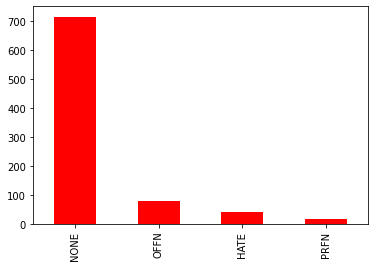

In [ ]:


print(label_t.value_counts())
import matplotlib.pyplot as plt
label_t.value_counts().plot(kind='bar', color='red')



In [ ]:


import numpy as np
classes_list_t = ["NONE","HATE","OFFN","PRFN"]
label_t_index = data_t['task_2'].apply(classes_list_t.index)
final_label_t = np.asarray(label_t_index)
print(final_label_t[:10])



[1 0 0 2 2 1 2 0 0 0]


In [ ]:


from keras.utils.np_utils import to_categorical
label_twoDimension_t = to_categorical(final_label_t, num_classes=4)



In [ ]:
print(label_twoDimension_t[:10])

[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [ ]:


text_t = data_t['text']
text_t.head(10)



0    Die Grüne Intelligenz Bestie 'Eckhardt', Prangert im Ticker,  Christen,sollen nicht die Moscheen anzünden?  Scheinbar sind  nach Ansicht von Eckha...
1                                                                                           Das Deutschlandlied,  Sinn und Unsinn  https://t.co/BIw9k6d1mH
2                                                                                                                     #Eurovision  https://t.co/24T8fzUI44
3                   Unsere ESC Kandidatinnen haben selbst Schuld an die 0 Point vom Public,denn wer soll denn Junge Frauen mit Nutten Fingernägel  wählen!
4                                                                                 Scheinbar bekommt Sarah's Conner's Sohn Vincent,bei Mädchen keinen Hoch!
5    #Bundeswehr  erst überzeugen Politische Linke,die Frau von der Gleichberechtigung,jetzt soll auch noch der Fachkräftemangel von der Frau ausgeglic...
6              Du bist ein Rassist,Du erhöhst Dich über andere,das ist

In [ ]:


import re 

def text_clean(text):
    ''' Pre process and convert texts to a list of words '''
    
    text=text.lower()

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub('https?://\S+|www\.\S+', "", text)
    text = re.sub(r"rt", " ", text)

    return text



In [ ]:
test_wo_umlauts = text_t.apply(lambda x: remove_umlaut(x))

In [ ]:
test_wo_umlauts.head()

0    Die Gruene Intelligenz Bestie 'Eckhardt', Prangert im Ticker,  Christen,sollen nicht die Moscheen anzuenden?  Scheinbar sind  nach Ansicht von Eck...
1                                                                                           Das Deutschlandlied,  Sinn und Unsinn  https://t.co/BIw9k6d1mH
2                                                                                                                     #Eurovision  https://t.co/24T8fzUI44
3                 Unsere ESC Kandidatinnen haben selbst Schuld an die 0 Point vom Public,denn wer soll denn Junge Frauen mit Nutten Fingernaegel  waehlen!
4                                                                                Scheinbar bekommt Sarah's Conner's Sohn Vincent,bei Maedchen keinen Hoch!
Name: text, dtype: object

In [ ]:
clean_text_t = test_wo_umlauts.apply(lambda x:text_clean(x))

In [ ]:
clean_text_t.head(10)

0    die gruene intelligenz bestie 'eckhardt', prange  im ticker,  christen,sollen nicht die moscheen anzuenden   scheinbar sind  nach ansicht von eckh...
1                                                                                                                  das deutschlandlied,  sinn und unsinn  
2                                                                                                                                             eurovision  
3                 unsere esc kandidatinnen haben selbst schuld an die 0 point vom public,denn wer soll denn junge frauen mit nutten fingernaegel  waehlen!
4                                                                                scheinbar bekommt sarah's conner's sohn vincent,bei maedchen keinen hoch!
5     bundeswehr  erst ueberzeugen politische linke,die frau von der gleichberechtigung,jetzt soll auch noch der fachkraeftemangel von der frau ausgegl...
6                                 du bist ein rassist,du erhoehst dich

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def stop_words_removal(text1):
    text1=[w for w in  text1.split(" ")  if w not in stopwords.words('german')]
    return " ".join(text1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
clean_text_t_ns=clean_text_t.apply(lambda x: stop_words_removal(x))

In [ ]:
print(clean_text_t_ns.head(10))

0    gruene intelligenz bestie 'eckhardt', prange  ticker,  christen,sollen moscheen anzuenden   scheinbar  ansicht eckhardt,nur christen taeter frage ...
1                                                                                                                          deutschlandlied,  sinn unsinn  
2                                                                                                                                             eurovision  
3                                                              esc kandidatinnen schuld 0 point public,denn wer junge frauen nutten fingernaegel  waehlen!
4                                                                                       scheinbar bekommt sarah's conner's sohn vincent,bei maedchen hoch!
5     bundeswehr  erst ueberzeugen politische linke,die frau gleichberechtigung,jetzt fachkraeftemangel frau ausgeglichen womoeglich fuehrungsaufgaben,...
6                                                                   ra

In [ ]:


# Stemming
from nltk.stem import SnowballStemmer 
stemmer = SnowballStemmer("german")

def word_stemmer(text):
    stem_text = "".join([stemmer.stem(i) for i in text])
    return stem_text



In [ ]:
clean_text_t_stem = clean_text_t_ns.apply(lambda x : word_stemmer(x))

In [ ]:
print(clean_text_t_stem.head(10))

0    gruene intelligenz bestie 'eckhardt', prange  ticker,  christen,sollen moscheen anzuenden   scheinbar  ansicht eckhardt,nur christen taeter frage ...
1                                                                                                                          deutschlandlied,  sinn unsinn  
2                                                                                                                                             eurovision  
3                                                              esc kandidatinnen schuld 0 point public,denn wer junge frauen nutten fingernaegel  waehlen!
4                                                                                       scheinbar bekommt sarah's conner's sohn vincent,bei maedchen hoch!
5     bundeswehr  erst ueberzeugen politische linke,die frau gleichberechtigung,jetzt fachkraeftemangel frau ausgeglichen womoeglich fuehrungsaufgaben,...
6                                                                   ra

In [ ]:


import keras
import tensorflow
from keras.preprocessing.text import Tokenizer
tok_test = Tokenizer(filters='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', lower=True, char_level = False)
tok_test.fit_on_texts(clean_text_t_stem)



In [ ]:


vocabulary_all_test = len(tok_test.word_counts)
print(vocabulary_all_test)



5560


In [ ]:


test_list = tok_test.word_index
print(test_list)



{'junge': 1, 'uwe': 2, 'mdl': 3, 'fuer': 4, 'deutschland': 5, 'schon': 6, 'afd': 7, 'blondjedi': 8, 'ralf64904117': 9, 'mal': 10, 'ekelwilfred': 11, 'ja': 12, 'mehr': 13, 'amp': 14, 'e': 15, 'a': 16, '2': 17, 'merkel': 18, 'wiltewka': 19, 'akk': 20, 'die': 21, 'ueber': 22, 'alias': 23, 'o': 24, 'wer': 25, 'wilberg': 26, 'loch': 27, 'immer': 28, 'ist': 29, 'wilayawilanar': 30, 'haben': 31, 'wurde': 32, 'pa': 33, 'wilke': 34, 'land': 35, 'papa': 36, 'gibt': 37, 'menschen': 38, 'en': 39, 'd': 40, 'spd': 41, 'welt': 42, 'frau': 43, 'wuerde': 44, 'ab': 45, 'deutsche': 46, 'sind': 47, 's': 48, 'fluechtlinge': 49, 'wohl': 50, 'geht': 51, 'werden': 52, 'hat': 53, 'ei': 54, 'ganz': 55, 'kinder': 56, 'gehen': 57, 'u': 58, 'besser': 59, 'waere': 60, 'warum': 61, 'capitol': 62, 'macht': 63, 'sein': 64, 'wird': 65, 'berlin': 66, 'deutschen': 67, 'nie': 68, 'kommt': 69, 'lassen': 70, 'nicht': 71, 'migranten': 72, 'frauen': 73, 'zeit': 74, 'gut': 75, 'koennen': 76, 'geld': 77, 'wegen': 78, 'eien': 79

In [ ]:
encoded_clean_text_t_stem = tok_all.texts_to_sequences(clean_text_t_stem)
print(clean_text_t_stem[0])
print(encoded_clean_text_t_stem[0])

gruene intelligenz bestie 'eckhardt', prange  ticker,  christen,sollen moscheen anzuenden   scheinbar  ansicht eckhardt,nur christen taeter frage kommend   wusste ja schon immer,' christen suender'!
[41, 5393, 723, 104, 2158, 4861, 1146, 4540, 723, 101, 216, 3270, 11, 10, 12, 723]


In [ ]:


from keras.preprocessing import sequence
max_length = 100
padded_clean_text_t_stem = sequence.pad_sequences(encoded_clean_text_t_stem, maxlen=max_length, padding='pre')




# FastText Embeddings


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!gunzip /content/drive/MyDrive/cc.de.300.vec.gz

In [ ]:


# FastText Emdedding link - https://fasttext.cc/docs/en/crawl-vectors.html

import os
embeddings_index = {}
f = open('/content/drive/MyDrive/cc.de.300.vec',encoding='utf-8',errors='ignore')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))



Loaded 2000000 word vectors.


In [ ]:


embedding_matrix = np.zeros((vocabulary_all+1, 300))
for word, i in tok_all.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
         embedding_matrix[i] = embedding_vector



# CNN1 Model


In [ ]:


from keras.preprocessing import sequence
from keras.preprocessing import text
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM, Bidirectional
from keras.layers import Conv1D, Flatten
from keras.preprocessing import text
from keras.models import Sequential,Model
from keras.layers import Dense ,Activation,MaxPool1D,Conv1D,Flatten,Dropout,Activation,Dropout,Input,Lambda,concatenate
from keras.utils import np_utils
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
import nltk
import csv
import pandas as pd

from keras.preprocessing import text as keras_text, sequence as keras_seq



In [ ]:
Embedding_Layer = Embedding(vocabulary_all+1, 300, weights=[embedding_matrix], input_length=max_length)

In [ ]:


CNN1_network=Sequential([Embedding_Layer,
                        Conv1D(128,3,activation="relu",padding='same'),
                       Dropout(0.2),
                       MaxPool1D(2),
                       Flatten(),
                       Dense(64,activation="relu"),
                       Dropout(0.3),
                       Dense(4,activation="sigmoid")
                       ])



In [ ]:
CNN1_network.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          5013300   
                                                                 
 conv1d_2 (Conv1D)           (None, 100, 128)          115328    
                                                                 
 dropout_3 (Dropout)         (None, 100, 128)          0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 50, 128)          0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6400)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                409664    
                                                      

In [ ]:
# https://stackoverflow.com/questions/62707558/importerror-cannot-import-name-adam-from-keras-optimizers
from tensorflow.keras.optimizers import Adam
CNN1_network.compile(loss = "binary_crossentropy", optimizer=Adam(lr=0.00003), metrics=["accuracy"])




/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


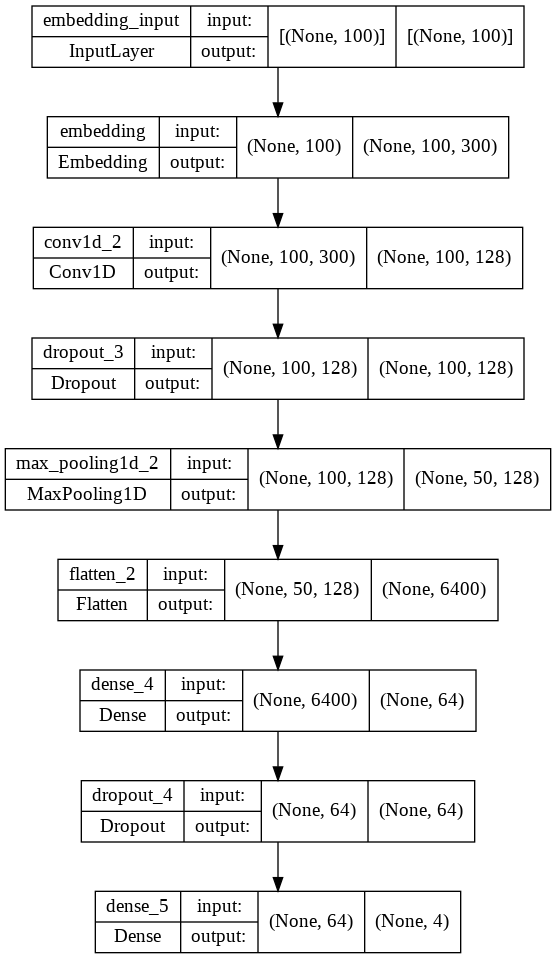

In [ ]:


from keras.utils.vis_utils import plot_model
plot_model(CNN1_network, to_file='CNN1_model.png', show_shapes=True, show_layer_names=True)



# Making of "earlystopper" and "reduce_lr"


In [ ]:


from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
earlystopper = EarlyStopping(patience=8, verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9,
                              patience=2, min_lr=0.00001, verbose=1)



# Model Fitting or Training


In [ ]:
hist = CNN1_network.fit(padded_clean_text_stem,label_twoDimension,epochs=200,batch_size=32,callbacks=[earlystopper, reduce_lr])

Epoch 1/200
120/120 [==============================] - 12s 13ms/step - loss: 0.5623 - accuracy: 0.8416 - lr: 3.0000e-05
Epoch 2/200
120/120 [==============================] - 1s 12ms/step - loss: 0.2550 - accuracy: 0.8934 - lr: 3.0000e-05
Epoch 3/200
120/120 [==============================] - 1s 12ms/step - loss: 0.2199 - accuracy: 0.8934 - lr: 3.0000e-05
Epoch 4/200
120/120 [==============================] - 1s 12ms/step - loss: 0.2169 - accuracy: 0.8934 - lr: 3.0000e-05
Epoch 5/200
120/120 [==============================] - 1s 12ms/step - loss: 0.2157 - accuracy: 0.8934 - lr: 3.0000e-05
Epoch 6/200
120/120 [==============================] - 1s 12ms/step - loss: 0.2143 - accuracy: 0.8934 - lr: 3.0000e-05
Epoch 7/200
120/120 [==============================] - 1s 12ms/step - loss: 0.2139 - accuracy: 0.8934 - lr: 3.0000e-05
Epoch 8/200
120/120 [==============================] - 1s 12ms/step - loss: 0.2098 - accuracy: 0.8934 - lr: 3.0000e-05
Epoch 9/200
120/120 [==========================

# log loss


In [ ]:
CNN1_model_predictions = CNN1_network.predict(padded_clean_text_t_stem)

In [ ]:
from sklearn.metrics import log_loss
log_loss_test= log_loss(label_twoDimension_t,CNN1_model_predictions)
log_loss_test

3.5401144499221893

# Classification Report


In [ ]:
predictions = np.zeros_like(CNN1_model_predictions)
predictions[np.arange(len(CNN1_model_predictions)), CNN1_model_predictions.argmax(1)] = 1

In [ ]:


predictionInteger=(np.argmax(predictions, axis=1))
predictionInteger



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:


pred_label = np.array(predictionInteger)
df = pd.DataFrame(data=pred_label , columns=["task2"])
print(df)



     task2
0        0
1        0
2        0
3        0
4        0
..     ...
845      0
846      0
847      0
848      0
849      0

[850 rows x 1 columns]


In [ ]:
df.to_csv("submission_DE_B_HASOC2019.csv", index=False)

In [ ]:


from sklearn.metrics import classification_report
print(classification_report(label_twoDimension_t,predictions))



              precision    recall  f1-score   support

           0       0.85      0.95      0.90       714
           1       0.00      0.00      0.00        41
           2       0.50      0.13      0.21        77
           3       0.06      0.06      0.06        18

   micro avg       0.81      0.81      0.81       850
   macro avg       0.35      0.28      0.29       850
weighted avg       0.76      0.81      0.77       850
 samples avg       0.81      0.81      0.81       850



# Epoch v/s Loss Plot


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

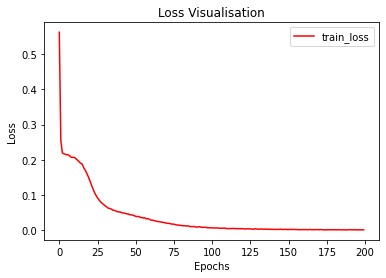

In [ ]:
from matplotlib import pyplot as plt
plt.plot(hist.history["loss"],color = 'red', label = 'train_loss')
#plt.plot(hist.history["val_loss"],color = 'blue', label = 'val_loss')
plt.title('Loss Visualisation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('CNN1_HASOC2019_TASK_B_Ger_lossPlot.pdf',dpi=1000)

from google.colab import files
files.download('CNN1_HASOC2019_TASK_B_Ger_lossPlot.pdf')

# Epoch v/s Accuracy Plot


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

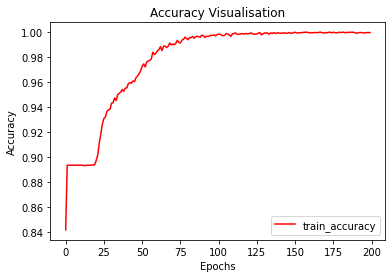

In [ ]:


plt.plot(hist.history["accuracy"],color = 'red', label = 'train_accuracy')
#plt.plot(hist.history["val_accuracy"],color = 'blue', label = 'val_accuracy')
plt.title('Accuracy Visualisation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('CNN1_HASOC2019_TASK_B_Ger_accuracyPlot.pdf',dpi=1000)
files.download('CNN1_HASOC2019_TASK_B_Ger_accuracyPlot.pdf') 



# Area under Curve-ROC


In [ ]:


pred_train = CNN1_network.predict(padded_clean_text_stem)
pred_test = CNN1_network.predict(padded_clean_text_t_stem)



In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

def plot_AUC_ROC(y_true, y_pred):
    n_classes = 2 #change this value according to class value

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
############################################################################################
    lw = 2
    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)
    
    colors = cycle(['aqua', 'darkorange'])
    #classes_list1 = ["DE","NE","DK"]
    classes_list1 = ["Non-duplicate","Duplicate"]
    for i, color,c in zip(range(n_classes), colors,classes_list1):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                label='{0} (AUC = {1:0.2f})'
                ''.format(c, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    #plt.show()
    plt.savefig('CNN1_HASOC2019_TASK_B_Ger_Area_RocPlot.pdf',dpi=1000)
    files.download('CNN1_HASOC2019_TASK_B_Ger_Area_RocPlot.pdf')

  



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

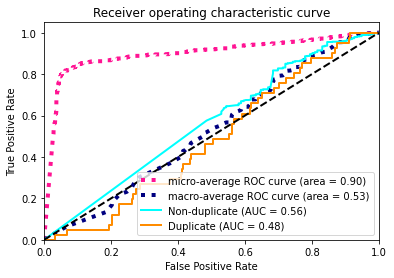

In [ ]:
plot_AUC_ROC(label_twoDimension_t,pred_test)